# The Hebrew Bible As JSON
Our [Text Annotation Tool](https://www.lighttag.io) has to work on any language, including RTL ones. We like to use the Bible for testing, but have been frustrated that it's hard to find it in a nice JSON format. 

So, this notebook and repo build that out. We use this for testing RTL stuff, you can use this to do fun NLP on the Bible in Hebrew
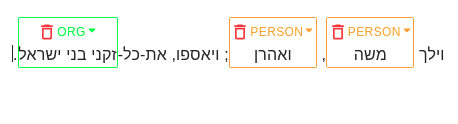

In [1]:
from bs4 import BeautifulSoup
import re
import os
import json

In [2]:
startLineRegex = re.compile('^.{1,2},.{1,2} ') # Each verse starts with chapter,verse
captureVerseDetails = re.compile('^(?P<chapter>.+?),(?P<verse>.+?) (?P<content>.+)') #exctract into a dict
bookTitle = re.compile('.+ - (?P<title>.+)') #Get the book title, onece per file

In [15]:
def structure(line,book):
    '''
        Get a line, split it into chapter,verse and content then append the book. 
        Returns it as a dict
    '''
    d = captureVerseDetails.search(line).groupdict()
    d['book'] = book
    return d
res =[] #collect all the results
for f in os.listdir('./rawData/'):
    if not f =='t0.htm' and f.endswith('.htm') and f.startswith('t'): #Ignore stuff
        path = os.path.join('./rawData/',f)
        html = open(path,encoding='iso-8859-8',errors='ignore') #Why did they use that encoding ? 
        soup= BeautifulSoup(html) #Parse the html
        txt = soup.get_text().replace('\xa0','').replace('{פ}','') #remove decoding errors and the פ thing
        try:
            title = bookTitle.search(txt).groupdict()['title']
        except:
            print(f)
        # Here we filter out lines that aren't versus and map the remaining to dicts
        verses = list(map(lambda x: structure(x,title),filter(startLineRegex.match,txt.splitlines())))
        res+=verses #append it to all of our results

        


tmp3.htm
tmp3prq.htm


In [16]:
json.dump(res,open('./jsons/hebreBibleVerses.json','w')) #Save it

In [17]:
startLineRegex.match(txt)

In [18]:
print((res[:10]))

[{'chapter': 'א', 'verse': 'א', 'content': 'המשא אשר חזה, חבקוק הנביא.', 'book': 'חבקוק'}, {'chapter': 'א', 'verse': 'ב', 'content': 'עד-אנה יהוה שועתי, ולא תשמע: אזעק אליך חמס, ולא תושיע.', 'book': 'חבקוק'}, {'chapter': 'א', 'verse': 'ג', 'content': 'למה תראני און ועמל תביט, ושד וחמס לנגדי; ויהי ריב ומדון, ישא.', 'book': 'חבקוק'}, {'chapter': 'א', 'verse': 'ד', 'content': 'על-כן תפוג תורה, ולא-יצא לנצח משפט: כי רשע מכתיר את-הצדיק, על-כן יצא משפט מעקל.', 'book': 'חבקוק'}, {'chapter': 'א', 'verse': 'ה', 'content': 'ראו בגוים והביטו, והתמהו תמהו: כי-פעל פעל בימיכם, לא תאמינו כי יספר.', 'book': 'חבקוק'}, {'chapter': 'א', 'verse': 'ו', 'content': 'כי-הנני מקים את-הכשדים, הגוי המר והנמהר; ההולך, למרחבי-ארץ, לרשת, משכנות לא-לו.', 'book': 'חבקוק'}, {'chapter': 'א', 'verse': 'ז', 'content': 'אים ונורא, הוא; ממנו, משפטו ושאתו יצא.', 'book': 'חבקוק'}, {'chapter': 'א', 'verse': 'ח', 'content': 'וקלו מנמרים סוסיו, וחדו מזאבי ערב, ופשו, פרשיו; ופרשיו, מרחוק יבאו--יעפו, כנשר חש לאכול.', 'book': 'חבק